In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from src.values import *
from src.utils import *

In [2]:
Delta_map = np.load('results_cluster\Results\Delta_map_Fz=5.npy')
Rabi_vals = np.load('results_cluster\Results\Rabi_vals_Fz=5.npy')
a_t_ = a_t * 3

In [5]:
np.floor(25*4/ a_t).astype(np.int64)

260

In [3]:
N_t = np.floor(25*4/ a_t_).astype(np.int64)
N_z = len(z_values) 
x = np.arange(N_t)* a_t_
y = np.arange(N_t)* a_t_ 
# X, Y = np.meshgrid(x, y)

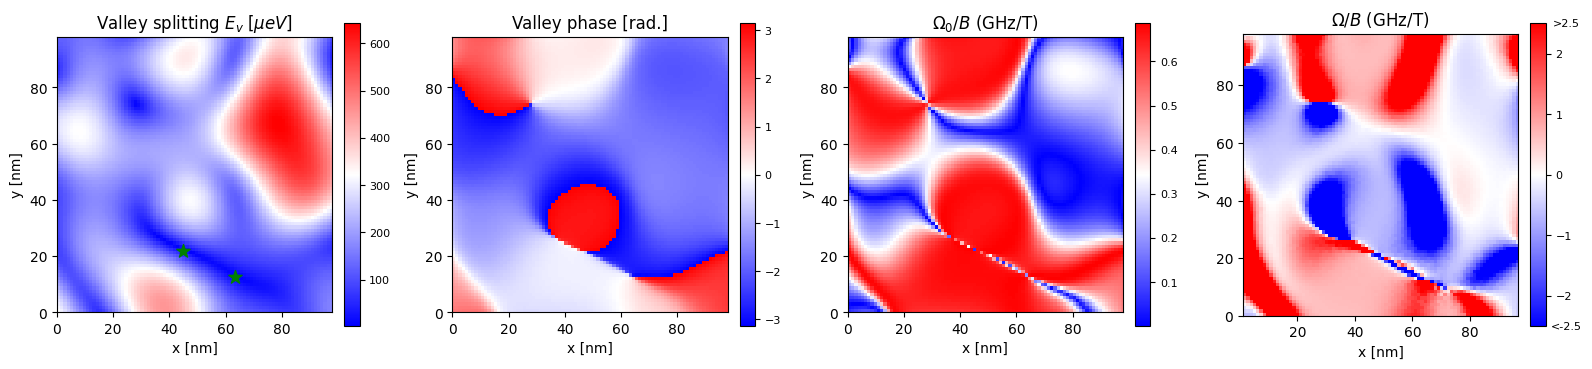

In [4]:

fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # (rows, cols)

ax = axes [0]
im = ax.imshow(2*Delta_map[:, :, 0].T*10**3, cmap="bwr", origin="lower", extent=[0, x.max(), 0, y.max()])
x_points, y_points = np.where(Delta_map[: ,:, 0] <10**(-3)) 
ax.scatter(x_points*a_t_, y_points*a_t_, color="green", marker="*", s=100)
ax.set_title('Valley splitting '+r'$E_v\;[\mu eV]$')
ax.set_xlabel("x [nm]")
ax.set_ylabel("y [nm]")
cbar = fig.colorbar(im, ax=ax, orientation="vertical", fraction=0.05, pad=0.04)
cbar.ax.tick_params(labelsize=8)

ax = axes[1]
im = ax.imshow(Delta_map[:, :, 1].T, cmap="bwr", origin="lower", extent=[0, x.max(), 0, y.max()])
# x_points, y_points = np.where(np.abs((np.abs(Delta_map[: ,:, 1])- np.pi/2))<10**(-4)) 
# ax.scatter(x_points*a_t_, y_points*a_t_, color="green", marker="*", s=100)

ax.set_title('Valley phase [rad.]')#+r'$E_v\;[\mu eV]$')
ax.set_xlabel("x [nm]")
ax.set_ylabel("y [nm]")
cbar = fig.colorbar(im, ax=ax, orientation="vertical", fraction=0.05, pad=0.04)
cbar.ax.tick_params(labelsize=8)

ax = axes[2]
im = ax.imshow(np.abs(Rabi_vals[:, :, 0]).T, cmap="bwr", origin="lower", extent=[0, x.max(), 0, y.max()])
ax.set_title(r'$\Omega_0/B$'+' (GHz/T)')
ax.set_xlabel("x [nm]")
ax.set_ylabel("y [nm]")
cbar = fig.colorbar(im, ax=ax, orientation="vertical", fraction=0.05, pad=0.04)
cbar.ax.tick_params(labelsize=8)


ax = axes[3]
Omega = Rabi_vals[:, :, 1].copy()
Omega[Omega>2.5]=2.5
Omega[Omega<-2.5]=-2.5
im = ax.imshow(Omega[1:-1,:].T, cmap="bwr", origin="lower", extent=[a_t_, x.max()-a_t_, 0, y.max()])

ax.set_title(r'$\Omega/B$'+' (GHz/T)')
ax.set_xlabel("x [nm]")
ax.set_ylabel("y [nm]")
cbar = fig.colorbar(im, ax=ax, orientation="vertical", fraction=0.05, pad=0.04)
cbar.ax.tick_params(labelsize=8)
cbar.ax.text(2.4, 1, '>2.5', fontsize=8, va='center', ha='center', transform=cbar.ax.transAxes)
cbar.ax.text(2.4, 0, '<-2.5', fontsize=8, va='center', ha='center', transform=cbar.ax.transAxes)


plt.tight_layout() 
plt.show()
